In [1]:
! pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [5]:
import kagglehub
path = kagglehub.dataset_download("kazanova/sentiment140")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sentiment140


In [12]:
import pandas as pd

file_path = f"{path}/training.1600000.processed.noemoticon.csv"

twitter_data = pd.read_csv(file_path, encoding="ISO-8859-1")
print(twitter_data.head())

   0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY _TheSpecialOne_  \
0  0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   scotthamilton   
1  0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY        mattycus   
2  0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         ElleCTF   
3  0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          Karoli   
4  0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY        joy_wolf   

  @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D  
0  is upset that he can't update his Facebook by ...                                                                   
1  @Kenichan I dived many times for the ball. Man...                                                                   
2    my whole body feels itchy and like its on fire                                                                    
3  @nationwideclass no, it's not behaving at all....           

DEPENDENCIES

In [7]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [14]:
twitter_data.shape

(1599999, 6)

In [15]:
twitter_data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [126]:
column_names = ['target', 'id', 'date', 'flag', 'user', 'text']
twitter_data = pd.read_csv(file_path,names=column_names, encoding="ISO-8859-1")

In [127]:
topic_keyword = "iPhone"
twitter_data = twitter_data[twitter_data['text'].str.contains(topic_keyword, case=False, na=False)]

In [128]:
twitter_data.shape

(7838, 6)

In [129]:
twitter_data.head()

,target,id,date,flag,user,text
251,0,1467875163,Mon Apr 06 22:36:38 PDT 2009,NO_QUERY,saraguilford12,"feeling lost, naked and confused (JK, sort of)..."
392,0,1467911302,Mon Apr 06 22:46:27 PDT 2009,NO_QUERY,jeanyah,"@benackerman BTW my iPhone is acting funny, dy..."
446,0,1467926444,Mon Apr 06 22:50:48 PDT 2009,NO_QUERY,ElliotTucker,Nasty budget due and my iphone is being sent t...
982,0,1468052484,Mon Apr 06 23:27:48 PDT 2009,NO_QUERY,deck86,Synching my contacts from my old mobile to iPh...
1559,0,1468180182,Tue Apr 07 00:09:03 PDT 2009,NO_QUERY,georgiesaid,"New iphone, yay! Not restoring backup, no! St..."


In [130]:
twitter_data.isnull().sum()

,0
target,0
id,0
date,0
flag,0
user,0
text,0


In [131]:
twitter_data['target'].value_counts()

,count
target,
0,5682
4,2156


In [79]:
twitter_data['target'].value_counts()

,count
target,
0,5682
1,2156


STEMMING

In [80]:
port_stem= PorterStemmer()

In [81]:
stop_words = set(stopwords.words('english'))

def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if word not in stop_words]
    return ' '.join(stemmed_content)

In [84]:
twitter_data['stemmed_content'] = twitter_data['text'].apply(stemming)

In [85]:
twitter_data.head()

,target,id,date,flag,user,text,stemmed_content
251,0,1467875163,Mon Apr 06 22:36:38 PDT 2009,NO_QUERY,saraguilford12,"feeling lost, naked and confused (JK, sort of)...",feel lost nake confus jk sort iphon
392,0,1467911302,Mon Apr 06 22:46:27 PDT 2009,NO_QUERY,jeanyah,"@benackerman BTW my iPhone is acting funny, dy...",benackerman btw iphon act funni die quickli fr...
446,0,1467926444,Mon Apr 06 22:50:48 PDT 2009,NO_QUERY,ElliotTucker,Nasty budget due and my iphone is being sent t...,nasti budget due iphon sent appl today
982,0,1468052484,Mon Apr 06 23:27:48 PDT 2009,NO_QUERY,deck86,Synching my contacts from my old mobile to iPh...,synch contact old mobil iphon import work well
1559,0,1468180182,Tue Apr 07 00:09:03 PDT 2009,NO_QUERY,georgiesaid,"New iphone, yay! Not restoring backup, no! St...",new iphon yay restor backup stupid appl


In [86]:
print(twitter_data['stemmed_content'])

251                      feel lost nake confus jk sort iphon
392        benackerman btw iphon act funni die quickli fr...
446                   nasti budget due iphon sent appl today
982           synch contact old mobil iphon import work well
1559                 new iphon yay restor backup stupid appl
                                 ...                        
1598295    zxed stuck iphon develop jail huh sure mean ip...
1598732                       christianaelli need food iphon
1598772      time load iphon music flight cg think pack long
1599145    reannatugiri si got iphon hope get job get one...
1599849    want free appl product iphon g macbook pro air...
Name: stemmed_content, Length: 7838, dtype: object


In [87]:
print(twitter_data['target'])

251        0
392        0
446        0
982        0
1559       0
          ..
1598295    1
1598732    1
1598772    1
1599145    1
1599849    1
Name: target, Length: 7838, dtype: int64


In [88]:
X = twitter_data['stemmed_content'].values
Y = twitter_data['target'].values

In [53]:
print(Y)

[0 0 0 ... 1 1 1]


Splitting data to training data and test data

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)

In [90]:
print(X.shape, X_train.shape, X_test.shape)

(7838,) (6270,) (1568,)


In [91]:
print(X_train)

['realiz qualifi quot true quot iphon upgrad price april even steal patent upgrad jan crush'
 'oh yeah iphon support calendar instead googl sync websit work add'
 'applecor iphon yet ipod touch good hear' ...
 'thisgirlsylvia thank look blog real comput iphon'
 'jwsherrod well crud next weekend come get iphon tuesday finali'
 'sonecessari talk iphon headset readi switch drive next month respons']


In [92]:
print(X_test)

['jasonwestwat cri sent iphon wish though someon hook'
 'seem like iphon push back day http bit ly ukozd'
 'pub alic go ball pond hate iphon camera blur easli http twitpic com er'
 ...
 'mich er hahaha guess part alway bring charger everywher wont run batteri iphon'
 'keep get error iphon' 'feel like iphon lull seem make new program']


In [93]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [94]:
print(X_train)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 56609 stored elements and shape (6270, 8604)>
  Coords	Values
  (0, 6068)	0.25721561381877084
  (0, 5979)	0.29844822237501384
  (0, 5999)	0.34413686380773606
  (0, 7727)	0.25326127165073464
  (0, 3635)	0.03842179907621721
  (0, 7968)	0.33405968154551224
  (0, 5859)	0.22366925448642466
  (0, 398)	0.29844822237501384
  (0, 2365)	0.1892794543169
  (0, 7087)	0.29266271031989044
  (0, 5544)	0.3244631019305126
  (0, 3797)	0.2792761512062334
  (0, 1641)	0.3244631019305126
  (1, 3635)	0.05381009065142459
  (1, 5327)	0.2563067452402832
  (1, 8486)	0.2903691508374524
  (1, 7228)	0.2919383202374642
  (1, 1108)	0.4028580291079781
  (1, 3586)	0.34968497597851506
  (1, 2963)	0.3268032341137294
  (1, 7286)	0.28052869976729206
  (1, 8190)	0.34968497597851506
  (1, 8363)	0.18775550628712612
  (1, 79)	0.36642394583170107
  (2, 3635)	0.07122553447734804
  :	:
  (6267, 4404)	0.28938990084264204
  (6267, 1486)	0.3627906679586814
  (6267, 860)	0.

In [95]:
print(X_test)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 12695 stored elements and shape (1568, 8604)>
  Coords	Values
  (0, 1625)	0.4723671467542912
  (0, 3328)	0.4723671467542912
  (0, 3635)	0.0658297444230286
  (0, 6579)	0.456859360368689
  (0, 6906)	0.3817771868070331
  (0, 7505)	0.3214423011312016
  (0, 8315)	0.30266409368195063
  (1, 591)	0.3250173889196461
  (1, 807)	0.3553257210838746
  (1, 1771)	0.3123360290131312
  (1, 3365)	0.27350077512218063
  (1, 3635)	0.07608572548608705
  (1, 4313)	0.29569311416273714
  (1, 4473)	0.3683584322249195
  (1, 5946)	0.4643079438910343
  (1, 6549)	0.3889185044278977
  (2, 621)	0.45465966508769334
  (2, 1123)	0.36141596633972617
  (2, 1441)	0.2526052934720732
  (2, 2314)	0.5106460246818663
  (2, 2935)	0.24891423010770308
  (2, 3185)	0.3366416075518741
  (2, 3365)	0.22484625013351334
  (2, 3635)	0.0625504262523282
  (2, 7802)	0.3291504724208853
  :	:
  (1564, 6974)	0.3255627963807548
  (1565, 244)	0.26185041182872754
  (1565, 663)	0.2337598

In [96]:
model = LogisticRegression(max_iter = 1000)

In [97]:
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [98]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [102]:
print('Accuracy score on training data:', training_data_accuracy)

Accuracy score on training data: 0.8365231259968102


In [100]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [101]:
print('Accuracy score on training data:', test_data_accuracy)

Accuracy score on training data: 0.7710459183673469


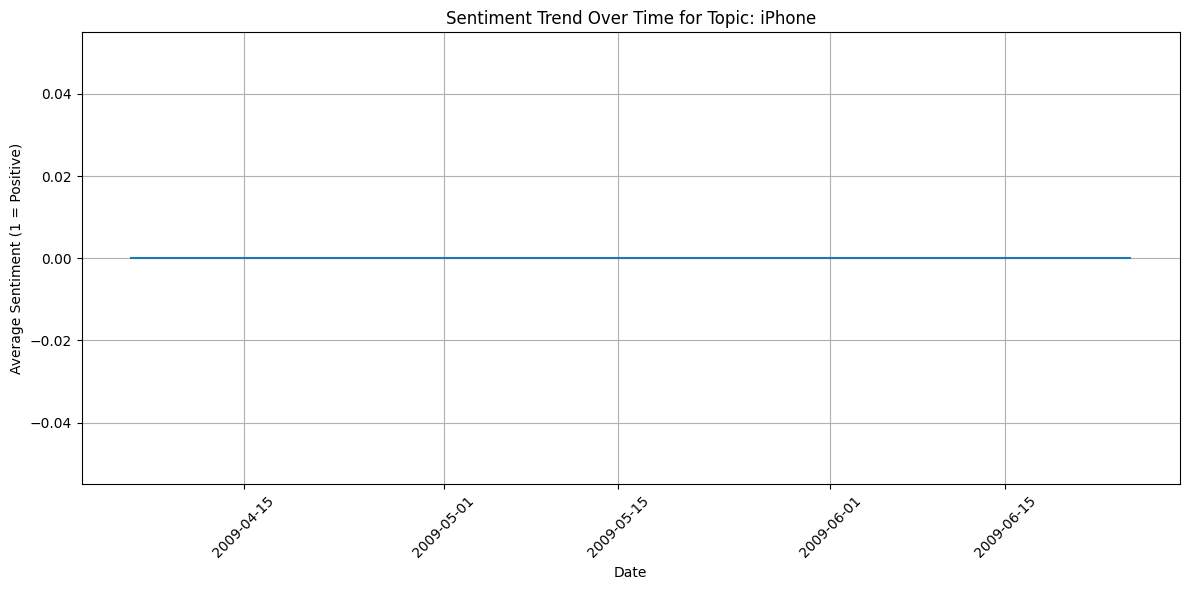

In [104]:
vectorized_text = vectorizer.transform(twitter_data['stemmed_content'].values)
twitter_data['predicted_sentiment'] = model.predict(vectorized_text)
twitter_data['date'] = pd.to_datetime(twitter_data['date'], errors='coerce')
twitter_data['sentiment_score'] = twitter_data['predicted_sentiment'].apply(lambda x: 1 if x == 4 else 0)
daily_sentiment = twitter_data.groupby(twitter_data['date'].dt.date)['sentiment_score'].mean()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_sentiment.index, y=daily_sentiment.values)
plt.title(f"Sentiment Trend Over Time for Topic: {topic_keyword}")
plt.xlabel("Date")
plt.ylabel("Average Sentiment (1 = Positive)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [67]:
import pickle

In [105]:
filename='trained_model.sav'
pickle.dump(model, open(filename,'wb'))

In [106]:
loaded_model = pickle.load(open('/content/trained_model.sav', 'rb'))

In [107]:
X_new = X_test[200]
print(Y_test[200])

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print("Negative Tweet")
else:
  print("Positive Tweet")

0
[0]
Negative Tweet


In [108]:
X_new = X_test[3]
print(Y_test[3])

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print("Negative Tweet")
else:
  print("Positive Tweet")

1
[0]
Negative Tweet
